In [11]:
## loading libraries
library(repr)
library(tidyverse)
library(tidymodels)
library(RCurl)
options(repr.matrix.max.rows = 6)

In [12]:
## read data on .csv file from GitHub 
url <- getURL("https://raw.githubusercontent.com/nitahieb/dsci100project/master/atp2017-2019.csv")
tennis_data_raw <- read_csv(url)

Warning message:
“Missing column names filled in: 'X1' [1]”


In [3]:
## cleaning and wrangling data
## removed unneccessary columns and mutated columns for which we would use for our data analyses
tennis_data <- tennis_data_raw %>%
    select(-X1) %>%
    mutate(rank_diff = (winner_rank - loser_rank), age_diff = (winner_age - loser_age)) %>%
    mutate(higher_rank_win = (winner_rank > loser_rank)) %>%
    select(rank_diff, age_diff, higher_rank_win)

In [4]:
## setting seed to keep data random
set.seed(9999)

#splitting the original data set into a training and testing data set. 
tennis_split <- initial_split(tennis_data, prop = 0.75, strata = higher_rank_win, na.rm=TRUE)
tennis_train_temp <- training(tennis_split)
tennis_test <- testing(tennis_split)

#removing any NA logicals from training data
tennis_train <- na.omit(tennis_train_temp)

In [5]:
## exploratory data analysis
tennis_train

## rank_diff represents the ranking difference between the winner and the loser of the tennis
## match. A negative rank_diff represents that the loser had a higher rank, while a positive
## rank_diff represents that the winner had a higher rank.

## age_diff represents the age difference between the winner and loser of the tennis match.
## Similiar to rank_diff, a negative age_diff represents that the loser was older, while a 
## positive age_diff represents that the winner was older.

## our chosen predictor variable is higher_rank_win which represents a logical about if the
## higher ranked player was able to defeat the lower ranked player in the tennis match. 

## through the use of na.omit(), we are able to begin our analyses with rows that are not 
## missing data.

## below represents a couple data points representing rank_diff, age_diff, and if the 
## higher ranked player won or not.

rank_diff,age_diff,higher_rank_win
<dbl>,<dbl>,<lgl>
-223,-10.819986,FALSE
208,13.837098,TRUE
-2,-5.125257,FALSE
⋮,⋮,⋮
-2,-0.4380561,FALSE
-11,3.2142368,FALSE
-61,-1.0951403,FALSE


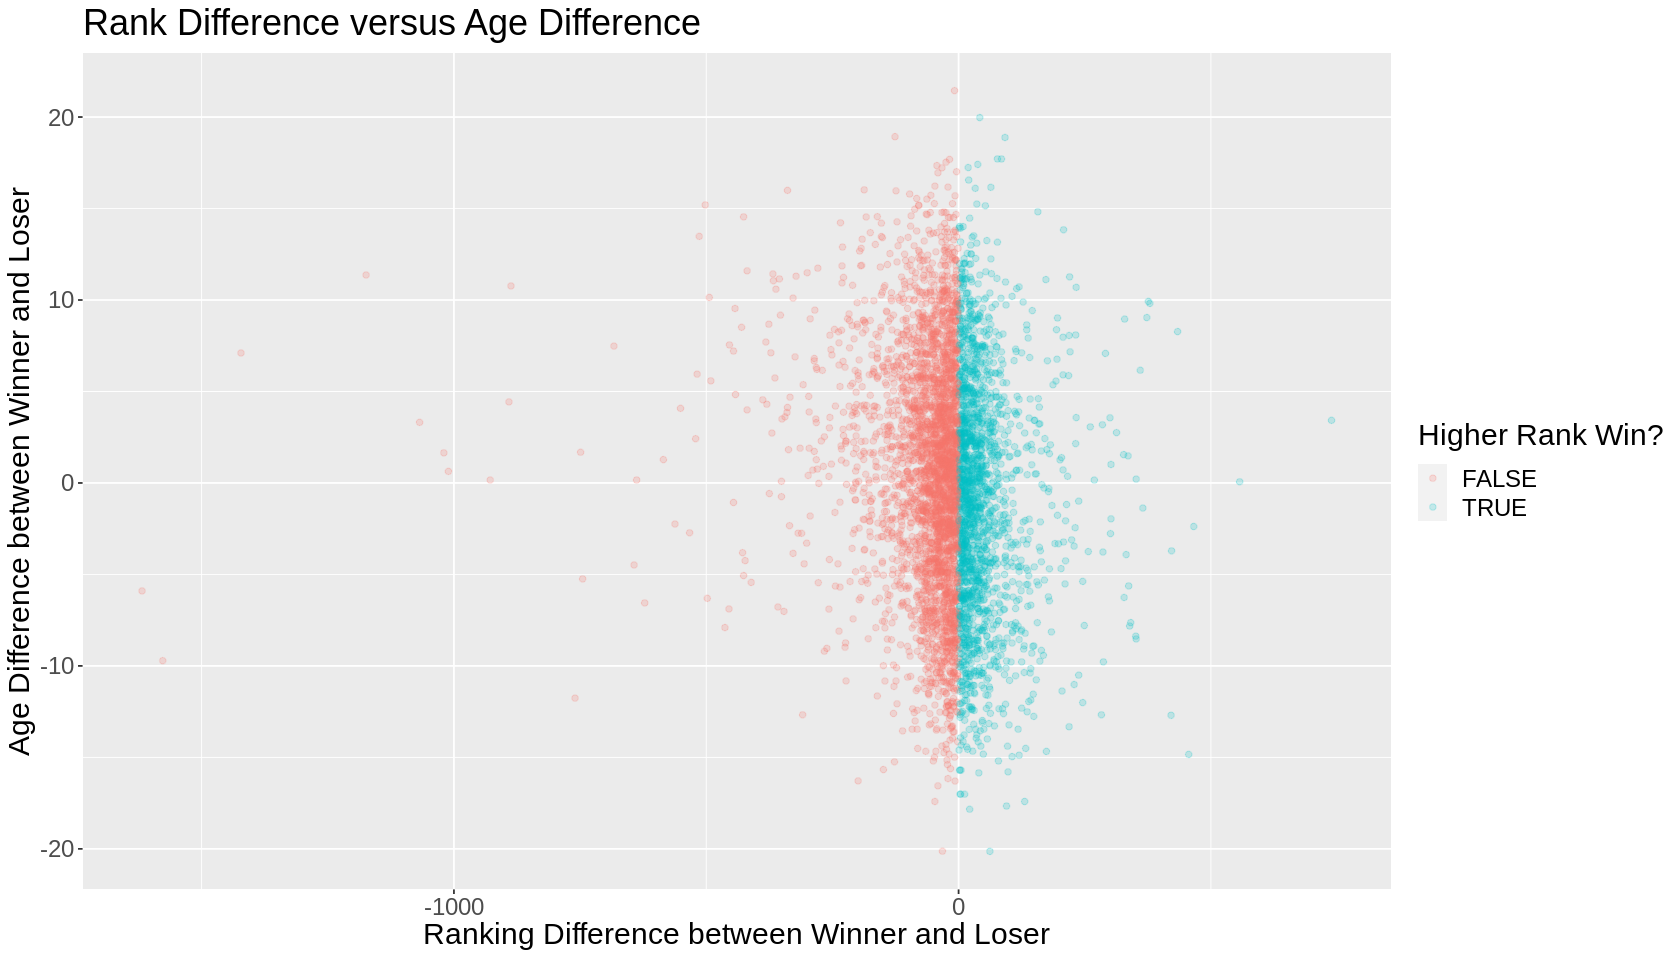

In [17]:
## plotting of the data

## this visualization aims to compare the relationship between ranking difference and age difference
## between winner and loser of tennis matches. 

## from this visualization there seems to be consistency where the predictor, higher_rank_win, will
## be from the difference in rank and difference in age.

tennis_train_plot <- tennis_train %>%
                     ggplot(aes(x = rank_diff, y = age_diff, color = higher_rank_win)) +
                     geom_point(alpha = 0.2) +
                     labs(x = "Ranking Difference between Winner and Loser", y = "Age Difference between Winner and Loser", color = "Higher Rank Win?") +
                     ggtitle("Rank Difference versus Age Difference") +
                     theme(text = element_text (size = 18))
tennis_train_plot